In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [6]:
# Load the dataset
# Assume the dataset is a CSV file named 'customer_id,purchase_amount,satisfa.csv'
data = pd.read_csv("customer_id,purchase_amount,satisfa.csv")

In [7]:
# Display the first few rows of the dataset
print(data.head())

   customer_id  purchase_amount  satisfaction_score  delivery_time  \
0            1           250.75                   4              5   
1            2           100.20                   3              7   
2            3           320.50                   5              2   
3            4           150.00                   2              8   
4            5            80.30                   4              3   

   product_quality  customer_service return_status  gender  age  
0                3                 4            No    Male   35  
1                2                 3           Yes  Female   42  
2                5                 5            No  Female   29  
3                1                 2           Yes    Male   50  
4                4                 4            No  Female   23  


In [8]:
# Data Preparation
# Check for missing values
print(data.isnull().sum())

customer_id           0
purchase_amount       0
satisfaction_score    0
delivery_time         0
product_quality       0
customer_service      0
return_status         0
gender                0
age                   0
dtype: int64


In [9]:
# Drop missing values (if any)
data = data.dropna()

In [10]:
# Data type correction (if needed)
data['return_status'] = data['return_status'].astype('category')
data['gender'] = data['gender'].astype('category')


In [11]:
# Initial Data Exploration
print(data.describe())
print(data.info())

       customer_id  purchase_amount  satisfaction_score  delivery_time  \
count    30.000000        30.000000           30.000000      30.000000   
mean     15.500000       199.995000            3.333333       5.200000   
std       8.803408       110.931132            1.268541       3.010327   
min       1.000000        60.500000            1.000000       1.000000   
25%       8.250000       102.712500            2.250000       2.250000   
50%      15.500000       178.325000            3.500000       5.000000   
75%      22.750000       279.250000            4.000000       7.750000   
max      30.000000       425.550000            5.000000      10.000000   

       product_quality  customer_service        age  
count        30.000000         30.000000  30.000000  
mean          3.233333          3.333333  37.000000  
std           1.330889          1.268541   9.047766  
min           1.000000          1.000000  22.000000  
25%           2.000000          2.250000  30.250000  
50%      

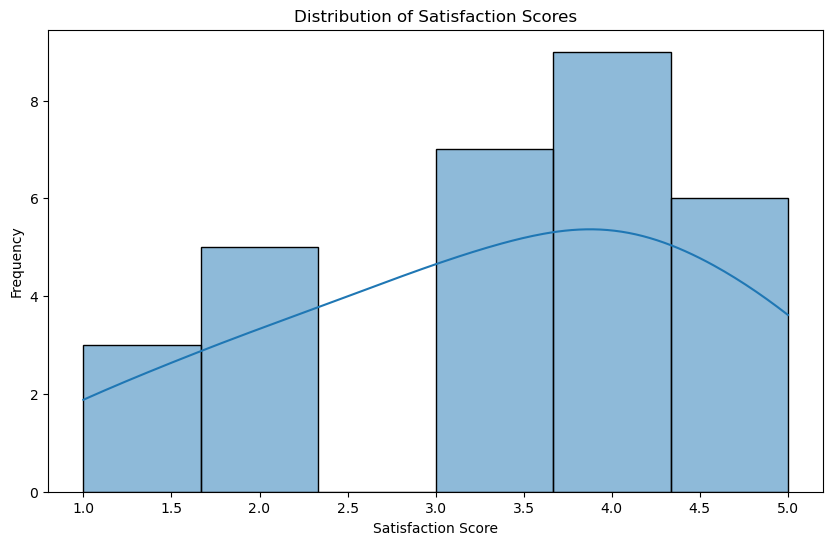

In [12]:
# Distribution of Satisfaction Scores
plt.figure(figsize=(10, 6))
sns.histplot(data['satisfaction_score'], kde=True)
plt.title('Distribution of Satisfaction Scores')
plt.xlabel('Satisfaction Score')
plt.ylabel('Frequency')
plt.show()

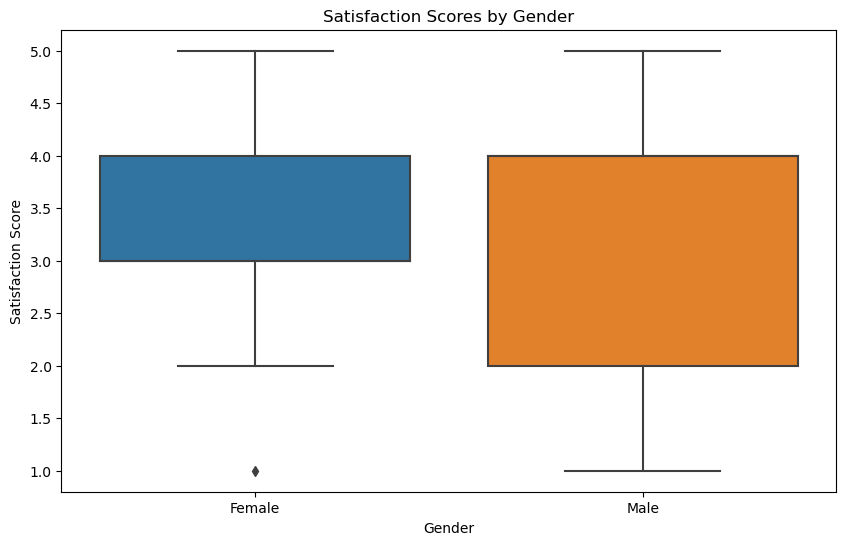

In [13]:
# Box Plot of Satisfaction Scores by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='satisfaction_score', data=data)
plt.title('Satisfaction Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Satisfaction Score')
plt.show()

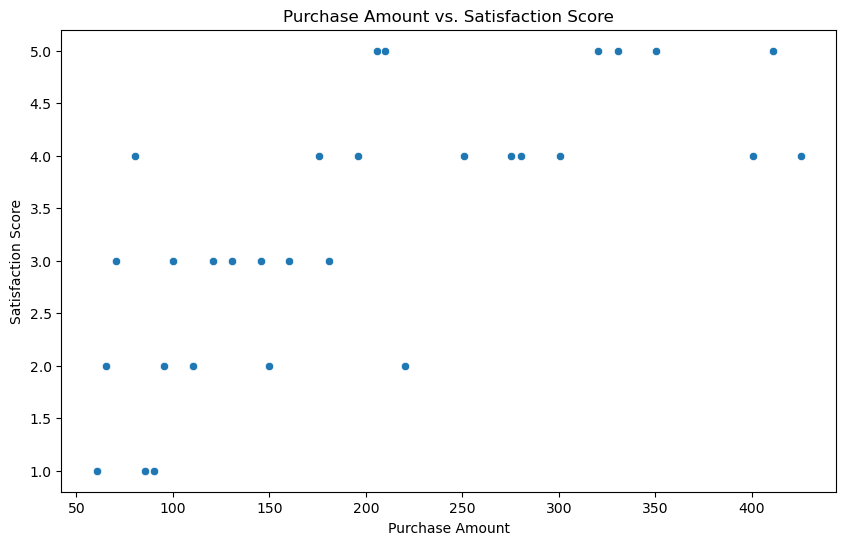

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='purchase_amount', y='satisfaction_score', data=data)
plt.title('Purchase Amount vs. Satisfaction Score')
plt.xlabel('Purchase Amount')
plt.ylabel('Satisfaction Score')
plt.show()

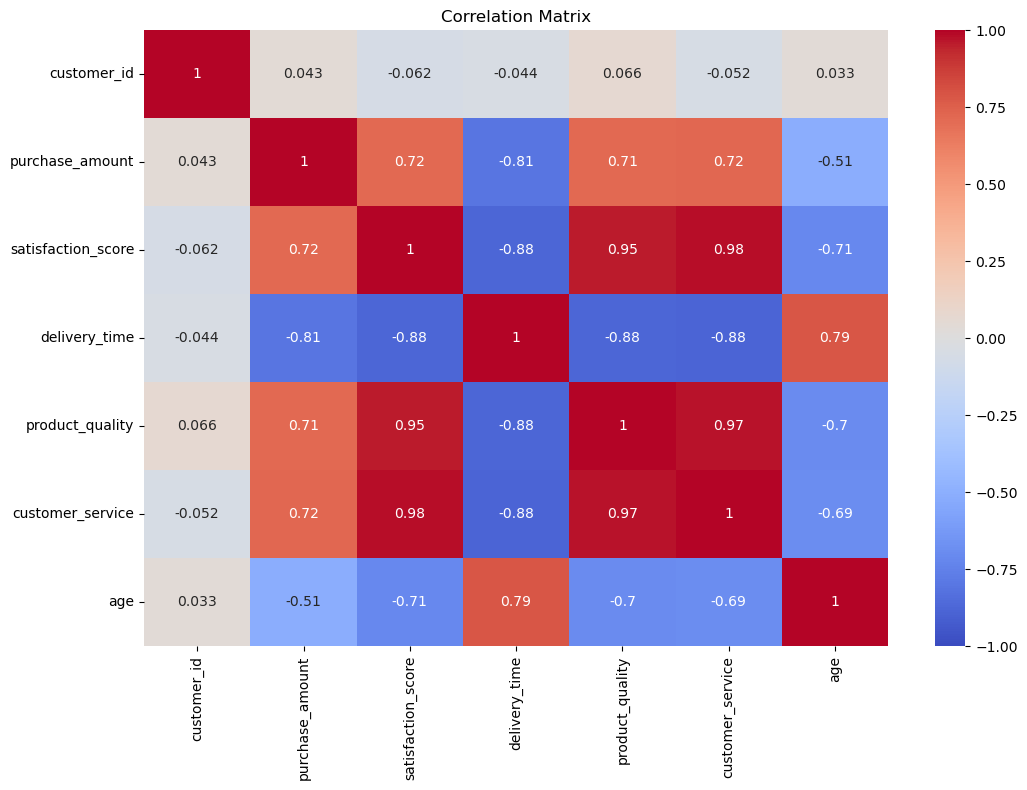

In [15]:
# Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [16]:
# T-test: Satisfaction Scores by Gender
male_scores = data[data['gender'] == 'Male']['satisfaction_score']
female_scores = data[data['gender'] == 'Female']['satisfaction_score']
t_stat, p_val = stats.ttest_ind(male_scores, female_scores)
print(f'T-test between male and female satisfaction scores: t-statistic = {t_stat}, p-value = {p_val}')

T-test between male and female satisfaction scores: t-statistic = -0.28324764140418096, p-value = 0.7790707159438758


In [17]:
# Simple Linear Regression: Purchase Amount vs. Satisfaction Score
X = data['purchase_amount']
Y = data['satisfaction_score']
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     satisfaction_score   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     29.65
Date:                Wed, 05 Jun 2024   Prob (F-statistic):           8.22e-06
Time:                        22:44:16   Log-Likelihood:                -38.363
No. Observations:                  30   AIC:                             80.73
Df Residuals:                      28   BIC:                             83.53
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.6932      0.343     

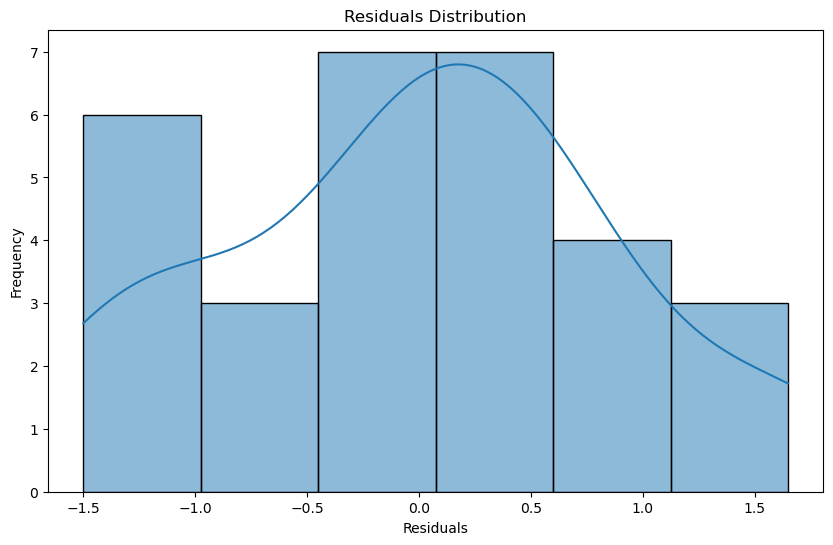

In [18]:
# Residual Analysis
residuals = model.resid
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()